In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC  
import pickle

In [21]:
# Oversampled Data
df_oversampled = pd.read_csv("../data/resampled/oversampled_data.csv")
df_oversampled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,class
0,4.022761,-7.060943,-3.122727,6.706148,-5.166049,2.301548,-4.583194,4.432560,-4.155426,4.895489,...,-0.298978,-0.396728,1.956584,-1.784317,1.110232,0.604141,0.569589,0.286480,-1.051825,0
1,10.896416,12.242884,2.971191,-8.791574,-2.054758,-7.072289,-1.582277,0.153548,1.516926,3.489578,...,-1.235915,0.750631,-1.403482,-0.555177,-0.836000,-0.245472,-1.314245,-1.002541,-0.369105,0
2,10.101060,0.392941,-0.958007,3.922657,0.747816,-3.300391,4.545585,-5.631004,-2.212439,-5.846624,...,0.820384,1.023873,0.108749,0.180126,-0.412965,0.555189,-0.880650,-0.014968,-0.332649,0
3,16.245734,8.882902,3.587902,-9.320039,-4.167340,0.317424,0.866514,-1.855077,4.270091,-5.082882,...,2.755104,1.037023,-1.773851,-1.265181,0.506058,-2.489170,-2.095464,-1.139908,0.535062,0
4,5.090924,-6.034171,5.765915,0.394056,-4.086182,11.122112,0.679368,-0.860469,1.967793,2.583814,...,0.196037,1.784845,-0.672810,0.759736,0.971426,-1.156872,-0.622250,1.460654,-0.008761,0
5,13.200631,-6.584079,-6.912367,-3.610110,-1.902176,-2.730864,-1.271967,0.254899,-0.699497,2.545727,...,-0.211441,0.934955,-0.026601,0.493040,0.014791,0.289944,0.585126,-1.288744,-0.146990,0
6,6.568622,1.366820,3.781401,4.076924,4.457311,-2.724677,-4.192927,-0.964424,-4.607617,0.878173,...,2.085779,-0.219197,-1.502176,5.865008,-1.873118,-2.467885,0.021170,1.117391,1.707667,0
7,8.472444,-8.627165,9.914423,-7.386450,-5.237825,12.965056,-1.728055,3.895913,4.683675,4.038980,...,-0.163817,-2.830403,0.107816,-1.561394,-0.953352,-0.757268,-0.581223,-0.031787,-1.201532,0
8,14.058249,-8.304185,0.556353,-11.200058,-0.067454,2.430836,4.800424,-4.776698,5.592344,9.675994,...,-0.830896,1.000233,0.191471,-1.841646,2.722601,-0.989469,-0.989466,2.519952,-0.416639,0
9,5.903162,0.820961,-1.618191,0.620798,-3.069442,0.746703,-3.654782,3.198979,-2.375475,5.860568,...,-1.567403,0.785349,-0.196636,-0.432670,1.276068,0.649963,0.676486,-1.002508,1.056771,0


In [22]:
# Undersampled Data
df_undersampled = pd.read_csv("../data/resampled/undersampled_data.csv")
df_undersampled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,class
0,16.306559,-4.053504,11.544170,-2.914599,-4.030473,20.299897,6.806870,-1.898586,-2.380656,-11.175384,...,0.352263,0.455304,1.484919,3.270641,-0.243741,-1.654044,-2.346995,-2.046216,-3.219721,0
1,16.245734,8.882902,3.587902,-9.320039,-4.167340,0.317424,0.866514,-1.855077,4.270091,-5.082882,...,2.755104,1.037023,-1.773851,-1.265181,0.506058,-2.489170,-2.095464,-1.139908,0.535062,0
2,10.949707,-6.528771,4.805917,-1.687464,-3.369688,12.780447,0.578050,-0.360049,-1.469986,1.376761,...,0.178499,0.815886,1.957061,0.114077,-0.336606,1.682449,-0.734458,1.201305,-0.321612,0
3,8.449733,-7.293462,-3.541505,-1.948532,-2.576560,-3.943999,0.800536,-3.993533,6.958001,2.386961,...,-0.596081,-0.773240,-1.001076,-0.323051,-0.809206,-0.824705,-0.620043,0.388324,-0.381711,0
4,20.611143,-2.472154,4.695242,-17.555197,-0.966808,8.507590,2.340409,0.683153,2.331995,4.358220,...,0.365272,1.789154,1.105863,-0.033007,0.678282,0.970452,-0.031796,-1.639882,0.221858,0
5,4.841889,-6.117708,6.120161,1.314364,-4.935512,10.519976,1.484332,-3.070978,5.477355,2.984986,...,0.053382,1.311598,-1.222493,1.290492,0.644353,-1.010501,0.328273,1.121712,-0.182285,0
6,15.943941,-5.461339,-6.233845,-0.436273,1.136955,-1.336595,1.647553,-1.387635,-6.393353,0.066315,...,-0.531587,0.874141,-0.847158,0.170383,1.593155,-0.140011,-0.441687,0.599789,1.170091,0
7,6.568622,1.366820,3.781401,4.076924,4.457311,-2.724677,-4.192927,-0.964424,-4.607617,0.878173,...,2.085779,-0.219197,-1.502176,5.865008,-1.873118,-2.467885,0.021170,1.117391,1.707667,0
8,9.433447,0.739057,3.432587,9.317039,-0.920094,-0.897364,0.397768,0.031468,-1.280686,-3.600888,...,0.463526,-0.346860,0.288047,0.535187,1.622070,-1.669075,-0.012705,0.324189,0.838047,0
9,16.448667,-1.616194,5.496420,0.129803,3.846117,5.393916,2.511988,-6.323913,-0.614575,-8.720116,...,1.118596,0.446822,1.244813,-1.253294,0.334098,0.971675,-0.333229,0.952757,0.566563,0


In [33]:
def createSVCModel(title, df):
  print("=============================================================")
  print(title)
  print("=============================================================")
  # Split features and target
  X = df.drop(["class"], axis=1)
  y = df["class"]
  
  # Split train-test set with 90% train set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=43)
  
  # Assign possible hyperparameters for SVC
  param_grid = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
  }
  
  # Search for best parameters for SVC, then train the dataset
  grid = GridSearchCV(SVC(probability=True), param_grid, refit=True)
  grid.fit(X_train, y_train)
  print(X_train.shape)
  
  # Print best hyperparameters tuning from GridSearchCV
  print("BEST PARAMETERS:")
  print(grid.best_estimator_)
  
  # Predict dataset from test set
  grid_predictions = grid.predict(X_test)
  
  # Get classification reports (precision, recall, and f1-score)
  print("CLASSIFICATION REPORT:")
  print(classification_report(y_test, grid_predictions))
  
  # Get confusion matrix
  cm = confusion_matrix(y_test, grid_predictions)
  cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  cm_display.plot()
  plt.show()
  
  # Return the trained model
  return grid


OVERSAMPLED DATA
(270, 195)
BEST PARAMETERS:
SVC(C=10, gamma=0.001, probability=True)
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



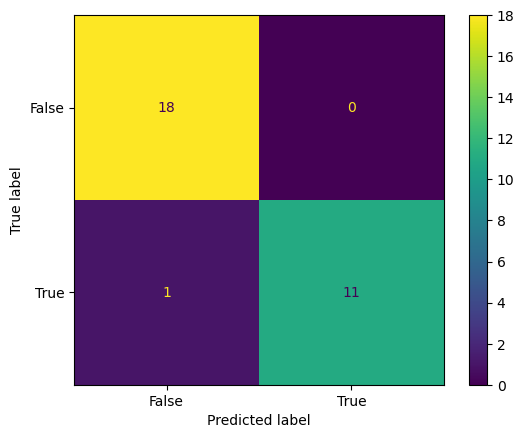

UNDERSAMPLED DATA
(140, 195)
BEST PARAMETERS:
SVC(C=10, gamma=0.001, kernel='sigmoid', probability=True)
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



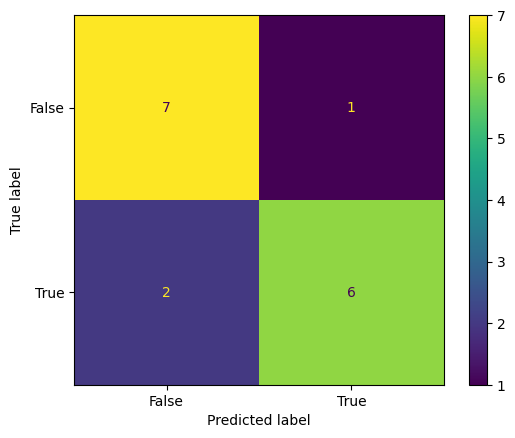

In [34]:
oversampledModel = createSVCModel("OVERSAMPLED DATA", df_oversampled)
undersampledModel = createSVCModel("UNDERSAMPLED DATA", df_undersampled)

# Evaluation

The models performs best when it is trained using oversampled data. It has reached 100% for each of the evaluation metrics.

In [35]:
# Save model to disk
pickle.dump(oversampledModel, open("../model/optimized_svc_model.pkl", "wb"))